<a href="https://colab.research.google.com/github/blakedshull/Project2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Upon exploring I would like to use my second choice, Taiwanese real estate

# My second choice is Taiwanese Real Estate data.

In [5]:
filename = '/content/Real estate valuation data set.xlsx'
df = pd.read_excel(filename)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.shape

(414, 8)

Everything is the right data type

In [7]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Checking for duplicates

In [8]:
df.duplicated().sum()

0

Renaming columns for legibility

In [9]:
df = df.rename(columns={'X1 transaction date': 'transaction date', 'X2 house age': 'house age', 'X3 distance to the nearest MRT station': 'distance to the nearest MRT station',
                          'X4 number of convenience stores': 'number of convenience stores', 'X5 latitude': 'latitude', 'X6 longitude': 'longitude', 
                          'Y house price of unit area': 'house price of unit area'})

In [10]:
df.isna().sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

Checking for outliers: no outliers

In [11]:
df.describe()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Scatter plots are the best way to interpret this data because they are for two numerical variables, and all of these columns are numerical

Text(0, 0.5, 'Age')

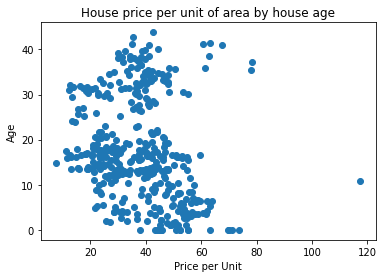

In [12]:
plt.scatter(data = df, x = 'house price of unit area', y = 'house age')
plt.title("House price per unit of area by house age")
plt.xlabel("Price per Unit")
plt.ylabel("Age")

There is definitely one outlier in price per unit, as seen on both graphs

Text(0, 0.5, 'Distance to nearest mass rapid transit')

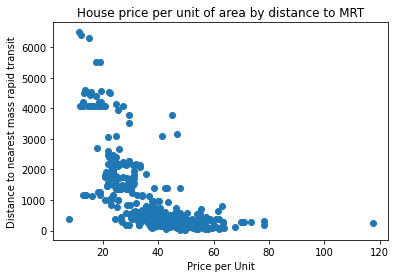

In [13]:
plt.scatter(data = df, x = 'house price of unit area', y = 'distance to the nearest MRT station')
plt.title("House price per unit of area by distance to MRT")
plt.xlabel("Price per Unit")
plt.ylabel("Distance to nearest mass rapid transit")

There seem to be two or three homes that are extremely far out from MRT, probably rural

### 1) Source of data

I found this data on UCI's machine learning repository.  It is gathered from Taiwan.

### 2) Brief description of data
This table contains  414 houses, sale date, age of house, distance to mass rapid transit station, number of conveience stores within walking distance, latitude, longitude, and price per ping (1 ping = 3.3m squared)
### 3) What is the target?
The target is the house price of unit area.  

### 4) Is this a classification or regression problem?
This is a regression problem, price is a numerical set of values.

### 5) How many features?
8, although 1 of them is just ID and is therefore useless.

### 6) How many rows of data.
There are 414 rows of data.

### 7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
One challenge in this data set is the limited area, this is only one district in one city.  

This data is also old, it may not be as useful.

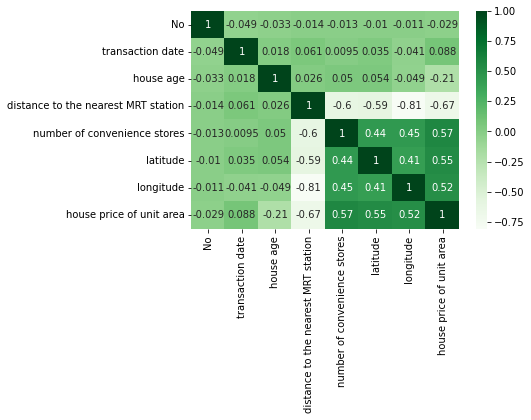

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)

## Positive Correlations
House price per unit of area is positively correlated with number of convenience stores nearby, longitude, and latitude.  Those three variables are all correlated with each other

## Negative Correlations
The most powerful predictor is distance from the nearest Mass Rapid Transit station.  It is very negatively correlated with House price per unit, and also the positively correlated variables listed above (convenience stores, long, lat)

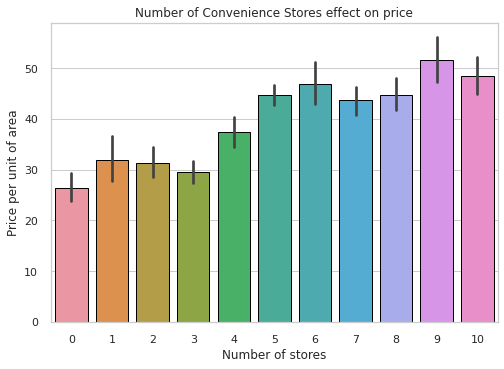

In [15]:
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.barplot(data = df, x = 'number of convenience stores', y = 'house price of unit area', edgecolor='black', )
plt.title("Number of Convenience Stores effect on price")
plt.xlabel("Number of stores")
plt.ylabel("Price per unit of area")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

This graph clearly visualizes the positive correlation between convenience stores and average price per unit of area.  

Text(0, 0.5, 'Latitude')

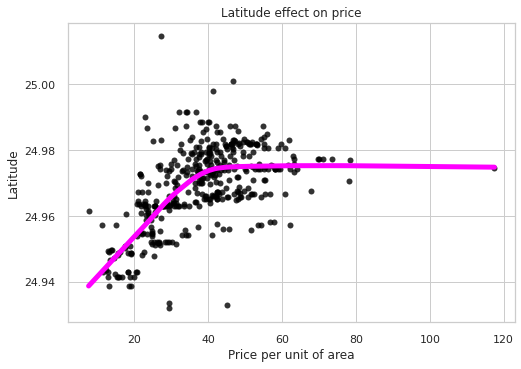

In [16]:
sns.regplot(data = df, x = 'house price of unit area', y = 'latitude', lowess=True, color="black", 
            line_kws={"color":"magenta", "linewidth":5})
plt.title("Latitude effect on price")
plt.xlabel("Price per unit of area")
plt.ylabel("Latitude")

Text(0, 0.5, 'Longitude')

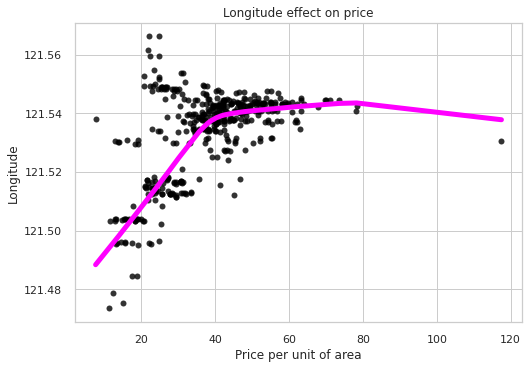

In [17]:
sns.regplot(data = df, x = 'house price of unit area', y = 'longitude', lowess=True, color="black", 
            line_kws={"color":"magenta", "linewidth":5})
plt.title("Longitude effect on price")
plt.xlabel("Price per unit of area")
plt.ylabel("Longitude")

Text(0, 0.5, 'distance to MRT')

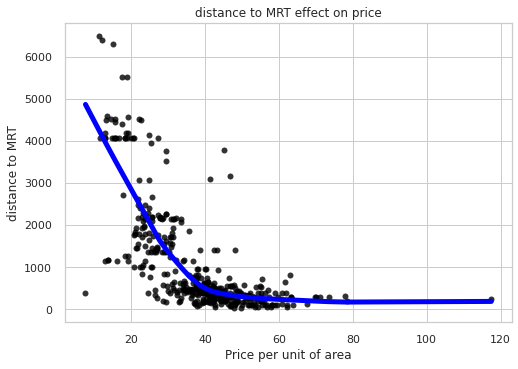

In [18]:
sns.regplot(data = df, x = 'house price of unit area', y = 'distance to the nearest MRT station', lowess=True, color="black", 
            line_kws={"color":"blue", "linewidth":5})
plt.title("distance to MRT effect on price")
plt.xlabel("Price per unit of area")
plt.ylabel("distance to MRT")

The graphs above show a line of best fit wherein longitude and latitude are very positively correlated with price up to a point, but it then evens out and is not relevant past a certain area.  High latitude is north, and in Taiwan, east is high longitude.  Northeast is the most expensive area.

## Pre-processing steps
The No column is irrelevant

In [19]:
df = df.drop('No', axis=1)
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### House price per unit of area is going to be the target for the purposes of all this analysis.

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.tree import DecisionTreeRegressor

In [21]:
def evaluate(model,X_train,X_test,y_train,y_test):
    print(f"Training Accuracy: {model.score(X_train, y_train):.3f}")
    print(f"Test Accuracy: {model.score(X_test, y_test):.3f}")

In [22]:
X = df.drop(columns=['house price of unit area'])
y = df['house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()

## First model, a decision tree

#### Base model accuracy:

In [23]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_pipe = make_pipeline(scaler, dec_tree)
dec_pipe.fit(X_train, y_train)
evaluate(dec_pipe, X_train, X_test, y_train, y_test)

Training Accuracy: 0.997
Test Accuracy: 0.574


#### Tuning:

In [24]:
from sklearn.model_selection import GridSearchCV

,Test Score,Train Score
3,0.679844,0.704898
4,0.651062,0.803898
5,0.6451,0.868188
8,0.613142,0.952629
6,0.612496,0.914958


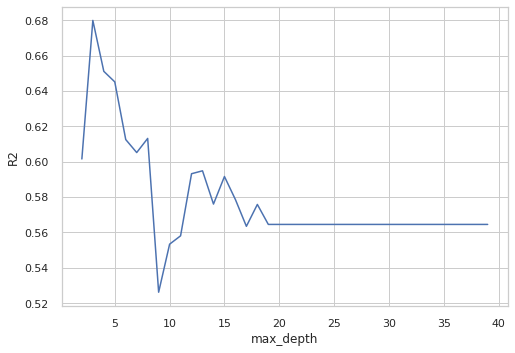

In [25]:
depths = list(range(2, 40))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_train, y_train)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

In [26]:
dec_tree_fin = DecisionTreeRegressor(max_depth = 3, random_state = 42)
dec_tree_fin.fit(X_train, y_train)
train_3_score = dec_tree_fin.score(X_train, y_train)
test_3_score = dec_tree_fin.score(X_test, y_test)
evaluate(dec_tree_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.705
Test Accuracy: 0.680


,Test Score,Train Score
9,0.708837,0.782708
4,0.708466,0.86408
13,0.706881,0.740229
10,0.70607,0.778763
6,0.705592,0.827636


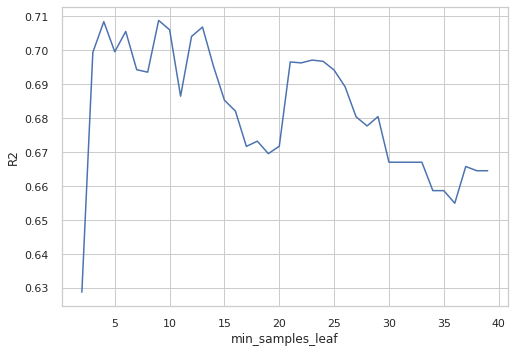

In [27]:
samples = list(range(2, 40))
scores2 = pd.DataFrame(index=samples, columns=['Test Score','Train Score'])
for sample in samples:
    dec_tree_fin = DecisionTreeRegressor(min_samples_leaf=sample, random_state=42)
    dec_tree_fin.fit(X_train, y_train)
    train_score = dec_tree_fin.score(X_train, y_train)
    test_score = dec_tree_fin.score(X_test, y_test)
    scores2.loc[sample, 'Train Score'] = train_score
    scores2.loc[sample, 'Test Score'] = test_score
plt.plot(samples, scores2['Test Score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('R2');
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

In [28]:
dec_tree_fin = DecisionTreeRegressor(min_samples_leaf = 9, random_state = 42)
dec_tree_fin.fit(X_train, y_train)
train_3_score = dec_tree_fin.score(X_train, y_train)
test_3_score = dec_tree_fin.score(X_test, y_test)
evaluate(dec_tree_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.783
Test Accuracy: 0.709


,Test Score,Train Score
26,0.709301,0.78269
39,0.709267,0.782708
31,0.709267,0.782708
27,0.709267,0.782708
28,0.709267,0.782708


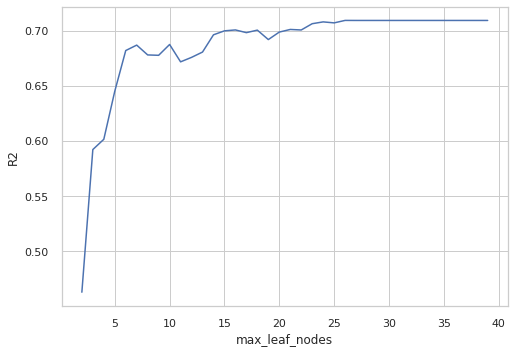

In [29]:
leaves = list(range(2, 40))
scores3 = pd.DataFrame(index=leaves, columns=['Test Score','Train Score'])
for leaf in leaves:
    dec_tree_fin = DecisionTreeRegressor(max_leaf_nodes=leaf, min_samples_leaf = 9, random_state=42)
    dec_tree_fin.fit(X_train, y_train)
    train_score = dec_tree_fin.score(X_train, y_train)
    test_score = dec_tree_fin.score(X_test, y_test)
    scores3.loc[leaf, 'Train Score'] = train_score
    scores3.loc[leaf, 'Test Score'] = test_score
plt.plot(leaves, scores3['Test Score'])
plt.xlabel('max_leaf_nodes')
plt.ylabel('R2');
sorted_scores3 = scores3.sort_values(by='Test Score', ascending=False)
sorted_scores3.head()

## Grid Search CV

In [30]:
dec_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeregressor', DecisionTreeRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeregressor': DecisionTreeRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': 42,
 'decisiontreeregressor__splitter': 'best'}

In [31]:
dec_tree_fin = DecisionTreeRegressor(max_leaf_nodes = 26, min_samples_leaf = 9, random_state = 42)
dec_tree_fin.fit(X_train, y_train)
evaluate(dec_tree_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.783
Test Accuracy: 0.709


dec_tree_fin is the best optimized decision tree for the base model, using the grid search yielded a similar result.

## Second model, Bagging Regressor

In [32]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

bagreg = BaggingRegressor(random_state = 42)

In [33]:
bagreg = BaggingRegressor(random_state = 42)

In [34]:
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

#### Base model accuracy

In [35]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9450218228127787
0.7196869311026053


#### Tuning

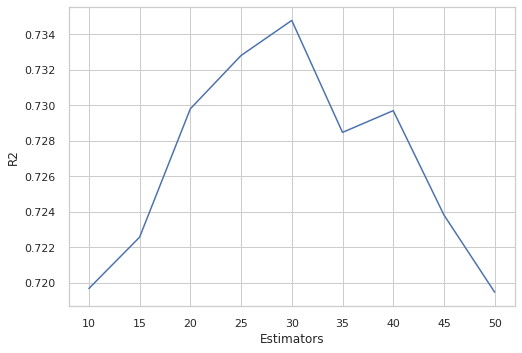

,Train Score,Test Score
30,0.948593,0.734774
25,0.950654,0.7328
20,0.949814,0.729799
40,0.946028,0.729698
35,0.945867,0.728474
45,0.9443,0.723825
15,0.949612,0.722577
10,0.945022,0.719687
50,0.943717,0.719481


In [36]:
estimators = [10, 15, 20, 25, 30, 35, 40, 45, 50]
bag_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   bag_train_score = bag_reg.score(X_train, y_train)
   bag_test_score = bag_reg.score(X_test, y_test)
   bag_scores.loc[num_estimators, 'Train Score'] = bag_train_score
   bag_scores.loc[num_estimators, 'Test Score'] = bag_test_score

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores['Test Score'])
plt.show()
bag_scores = bag_scores.sort_values(by='Test Score', ascending=False)
bag_scores

In [37]:
bag_reg_fin = BaggingRegressor(n_estimators=30,)
bag_reg_fin.fit(X_train, y_train)
evaluate(bag_reg_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.951
Test Accuracy: 0.738


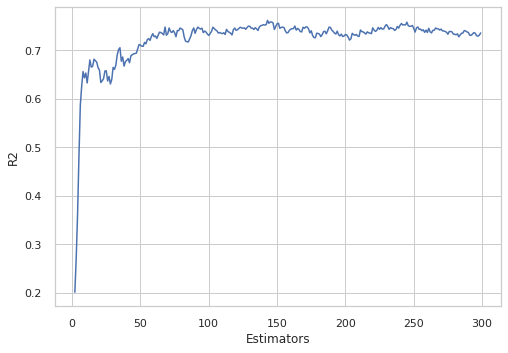

,Train Score,Test Score
143,0.87628,0.761878
145,0.878189,0.758795
146,0.878566,0.75849
245,0.92658,0.758193
147,0.878415,0.757
...,...,...
6,0.563503,0.587331
5,0.479574,0.483198
4,0.408534,0.364336
3,0.298041,0.272948


In [38]:
samples = list(range(2, 300))
bag_scores2 = pd.DataFrame(index=samples, columns=['Train Score', 'Test Score'])
for sample in samples:
   bag_reg_fin = BaggingRegressor(max_samples=sample, random_state=42,n_estimators=30)
   bag_reg_fin.fit(X_train, y_train)
   bag_train_score = bag_reg_fin.score(X_train, y_train)
   bag_test_score = bag_reg_fin.score(X_test, y_test)
   bag_scores2.loc[sample, 'Train Score'] = bag_train_score
   bag_scores2.loc[sample, 'Test Score'] = bag_test_score

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores2['Test Score'])
plt.show()
bag_scores2 = bag_scores2.sort_values(by='Test Score', ascending=False)
bag_scores2

In [39]:
model2 = BaggingRegressor(random_state=42)
param_grid2 = {'n_estimators': [5,10,15,20,25,30,35,40],
              'max_samples': [25,50,75,100,125,143,150]}
dt_grid_search2 = GridSearchCV(model2, param_grid2)
dt_grid_search2.fit(X_train, y_train)
dt_grid_search2.best_params_

{'max_samples': 143, 'n_estimators': 40}

In [40]:
bag_reg_fin = BaggingRegressor(max_samples=143, n_estimators=30, random_state=42)
bag_reg_fin.fit(X_train, y_train)
evaluate(bag_reg_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.876
Test Accuracy: 0.762


In [41]:
bag_reg_fin2 = BaggingRegressor(max_samples=143, n_estimators=40, random_state=42)
bag_reg_fin2.fit(X_train, y_train)
evaluate(bag_reg_fin2, X_train, X_test, y_train, y_test)

Training Accuracy: 0.875
Test Accuracy: 0.755


bag_reg_fin is best for a Bagging Regressor, and better than a decision tree

## Random Forest Model




In [42]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Base model acc

In [43]:
evaluate(rf, X_train, X_test, y_train, y_test)

Training Accuracy: 0.947
Test Accuracy: 0.730


#### Tuning

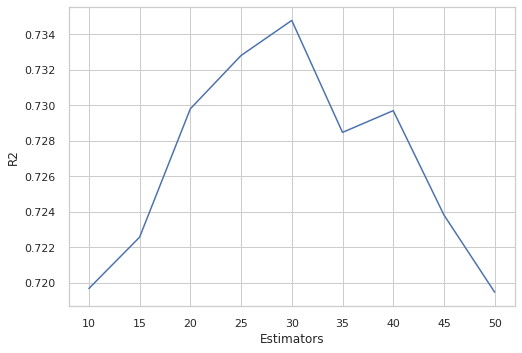

,Train Score,Test Score
30,0.948593,0.734774
25,0.950654,0.7328
20,0.949814,0.729799
40,0.946028,0.729698
35,0.945867,0.728474


In [44]:
estimators = [10, 15, 20, 25, 30, 35, 40, 45, 50]
bag_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   bag_train_score = bag_reg.score(X_train, y_train)
   bag_test_score = bag_reg.score(X_test, y_test)
   bag_scores.loc[num_estimators, 'Train Score'] = bag_train_score
   bag_scores.loc[num_estimators, 'Test Score'] = bag_test_score

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores['Test Score'])
plt.show()
bag_scores = bag_scores.sort_values(by='Test Score', ascending=False)
bag_scores.head()

,Test Score,Train Score
11,0.732449,0.945701
14,0.732277,0.947733
101,0.731263,0.947455
139,0.731263,0.947455
129,0.731263,0.947455


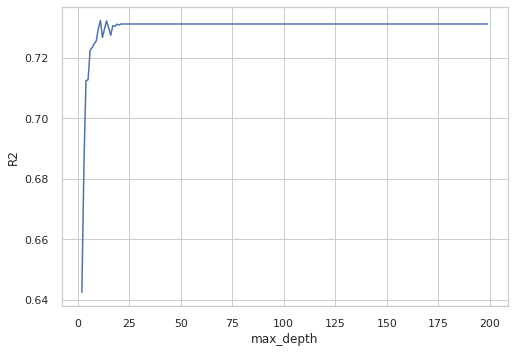

In [45]:
depths2 = list(range(2, 200))
bag_scores2 = pd.DataFrame(index=depths2, columns=['Test Score','Train Score'])
for depth2 in depths2:
    bagforest = RandomForestRegressor(max_depth=depth2, n_estimators=30, random_state=42)
    bagforest.fit(X_train, y_train)
    bagforest_train_score = bagforest.score(X_train, y_train)
    bagforest_test_score = bagforest.score(X_test, y_test)
    bag_scores2.loc[depth2, 'Train Score'] = bagforest_train_score
    bag_scores2.loc[depth2, 'Test Score'] = bagforest_test_score
plt.plot(depths2, bag_scores2['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');
bag_scores2 = bag_scores2.sort_values(by='Test Score', ascending=False)
bag_scores2.head()

Adjusting the above hyperparameter isn't useful

,Test Score,Train Score
5,0.758005,0.81987
6,0.755483,0.804137
4,0.753865,0.8358
7,0.747114,0.789984
3,0.743317,0.861383


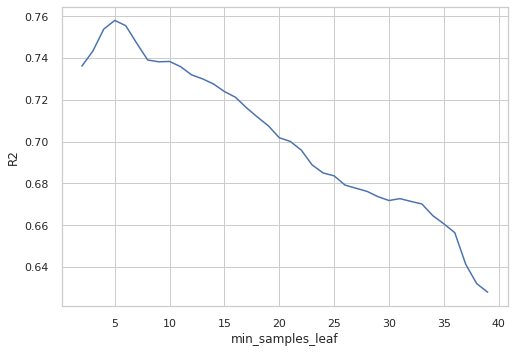

In [46]:
samples5 = list(range(2, 40))
scores5 = pd.DataFrame(index=samples5, columns=['Test Score','Train Score'])
for sample in samples5:
    bagforest2 = RandomForestRegressor(min_samples_leaf=sample, n_estimators=30, random_state=42)
    bagforest2.fit(X_train, y_train)
    train_score = bagforest2.score(X_train, y_train)
    test_score = bagforest2.score(X_test, y_test)
    scores5.loc[sample, 'Train Score'] = train_score
    scores5.loc[sample, 'Test Score'] = test_score
plt.plot(samples5, scores5['Test Score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('R2');
sorted_scores5 = scores5.sort_values(by='Test Score', ascending=False)
sorted_scores5.head()

In [47]:
best_bag = RandomForestRegressor(min_samples_leaf=5, n_estimators=30, random_state=42)
best_bag.fit(X_train, y_train)
evaluate(best_bag, X_train, X_test, y_train, y_test)

Training Accuracy: 0.820
Test Accuracy: 0.758


In [48]:
bag_reg_fin = BaggingRegressor(max_samples=143, n_estimators=30, random_state=42)
bag_reg_fin.fit(X_train, y_train)
evaluate(bag_reg_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.876
Test Accuracy: 0.762


bag_reg_fin is still my best model.

### Feature Engineering

In [49]:
df2 = pd.read_excel(filename)
df2.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [50]:
df2 = df2.rename(columns={'X1 transaction date': 'transaction date', 'X2 house age': 'house age', 'X3 distance to the nearest MRT station': 'distance to the nearest MRT station',
                          'X4 number of convenience stores': 'number of convenience stores', 'X5 latitude': 'latitude', 'X6 longitude': 'longitude', 
                          'Y house price of unit area': 'house price of unit area'})

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


I would like to convert transaction date to datetime, having trouble.  Will ask for help and do it tomorrow.  I will perform PCA even though it isn't very applicable, just to have something to work with.

In [52]:
df2 = df2.drop('No', axis=1)
df2.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components = .95)

In [55]:
X2 = df.drop(columns=['house price of unit area'])
y2 = df['house price of unit area']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [56]:
bagpca = make_pipeline(pca, bag_reg_fin)
bagpca.fit(X2_train, y2_train)
evaluate(bagpca, X2_train, X2_test, y2_train, y2_test)

Training Accuracy: 0.830
Test Accuracy: 0.609


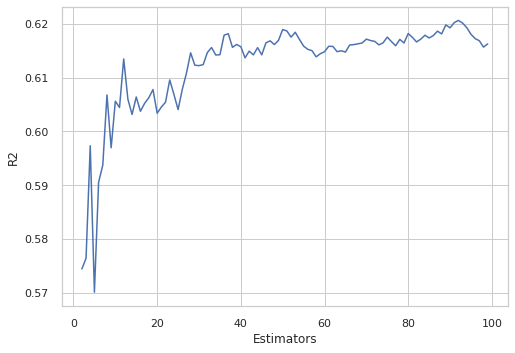

,Train Score,Test Score
92,0.93361,0.620646
91,0.933295,0.620233
93,0.933868,0.620149
89,0.93288,0.61981
94,0.933406,0.619312
...,...,...
7,0.910906,0.593735
6,0.913055,0.590567
3,0.878971,0.576439
2,0.847199,0.574446


In [57]:
estimators3 = list(range(2, 100))
bag_scores3 = pd.DataFrame(index=estimators3, columns=['Train Score', 'Test Score'])
for num_estimators2 in estimators3:
   bag_reg_pca = BaggingRegressor(n_estimators=num_estimators2, random_state=42)
   bagpca = make_pipeline(pca, bag_reg_pca)
   bagpca.fit(X2_train, y2_train)
   bag_train_score2 = bagpca.score(X2_train, y2_train)
   bag_test_score2 = bagpca.score(X2_test, y2_test)
   bag_scores3.loc[num_estimators2, 'Train Score'] = bag_train_score2
   bag_scores3.loc[num_estimators2, 'Test Score'] = bag_test_score2

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores3['Test Score'])
plt.show()
bag_scores3 = bag_scores3.sort_values(by='Test Score', ascending=False)
bag_scores3

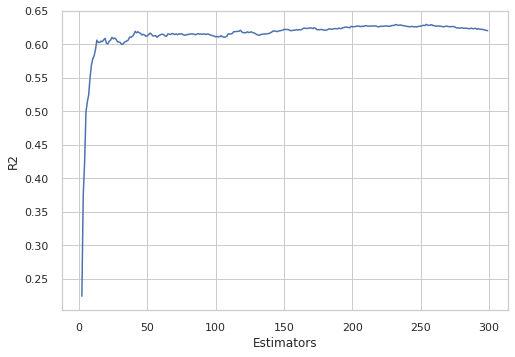

,Train Score,Test Score
254,0.909878,0.629774
232,0.898089,0.62959
258,0.911718,0.629337
235,0.899392,0.62891
231,0.897747,0.6289
...,...,...
6,0.549633,0.514092
5,0.535517,0.498898
4,0.484323,0.423737
3,0.44797,0.374832


In [58]:
samples2 = list(range(2, 300))
bag_scores4 = pd.DataFrame(index=samples2, columns=['Train Score', 'Test Score'])
for sample2 in samples2:
   bag_reg_temp = BaggingRegressor(max_samples=sample2, random_state=42,  n_estimators=92)
   bag_reg_fin2 = make_pipeline(pca, bag_reg_temp)
   bag_reg_fin2.fit(X2_train, y2_train)
   bag_train_score4 = bag_reg_fin2.score(X2_train, y2_train)
   bag_test_score4 = bag_reg_fin2.score(X_test, y2_test)
   bag_scores4.loc[sample2, 'Train Score'] = bag_train_score4
   bag_scores4.loc[sample2, 'Test Score'] = bag_test_score4

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores4['Test Score'])
plt.show()
bag_scores4 = bag_scores4.sort_values(by='Test Score', ascending=False)
bag_scores4

In [59]:
best_pca = BaggingRegressor(max_samples=254, random_state=42,  n_estimators=92)
best_pca.fit(X2_train, y2_train)

BaggingRegressor(max_samples=254, n_estimators=92, random_state=42)

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
def eval(y_true, y_pred):  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [62]:
print('Training')
eval(y_train, dec_tree_fin.predict(X_train))
print('Testing')
eval(y_test, dec_tree_fin.predict(X_test))

Training
scores: 
MAE: 4.36 
MSE: 41.52 
RMSE: 6.44 
R2: 0.78
Testing
scores: 
MAE: 4.76 
MSE: 46.11 
RMSE: 6.79 
R2: 0.71


In [63]:
bag_reg_fin = BaggingRegressor(max_samples=143, n_estimators=30, random_state=42)
bag_reg_fin.fit(X_train, y_train)
print('Training')
eval(y_train, bag_reg_fin.predict(X_train))
print('Testing')
eval(y_test, bag_reg_fin.predict(X_test))

Training
scores: 
MAE: 3.10 
MSE: 23.64 
RMSE: 4.86 
R2: 0.88
Testing
scores: 
MAE: 4.03 
MSE: 37.77 
RMSE: 6.15 
R2: 0.76


In [64]:
print('Training')
eval(y_train, best_bag.predict(X_train))
print('Testing')
eval(y_test, best_bag.predict(X_test))

Training
scores: 
MAE: 3.65 
MSE: 34.42 
RMSE: 5.87 
R2: 0.82
Testing
scores: 
MAE: 4.10 
MSE: 38.38 
RMSE: 6.20 
R2: 0.76


In [65]:
print('Training')
eval(y_train, best_pca.predict(X2_train))
print('Testing')
eval(y_test, best_pca.predict(X2_test))

Training
scores: 
MAE: 2.30 
MSE: 13.17 
RMSE: 3.63 
R2: 0.93
Testing
scores: 
MAE: 4.24 
MSE: 41.26 
RMSE: 6.42 
R2: 0.74


### As expected and stated above, PCA was not useful here.  I look forward to doing the datetime.  The best model by all metrics is the bagging regressor

In [66]:
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Feature Engineering:
I will now clean up the transaction date data column, it is a really messy way of encoding data.  It is over the course of a year, having all 12 months.  The exact date of the transactions is not recorded.  

In [67]:
df['transaction date'].value_counts()

2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: transaction date, dtype: int64

Splitting the transaction date into month and year and then dropping the redundant column.  I did this by splitting the number before and after the decimal, then multiplying the decimal by 12 and adding 1, because the year starts at the first month

In [68]:
df['transaction date'] = df['transaction date'].astype("string")
df[['year','month']] = df['transaction date'].str.split('.', expand=True)
df['month'] = '.' + df['month']
df['year'] = df['year'].astype("int")
df['month'] = df['month'].astype("float")
df['month'] = ((12 * df['month']) + 1).round()
df['month'] = df['month'].astype("string")
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,year,month
0,2012.9166667,32.0,84.87882,10,24.98298,121.54024,37.9,2012,12.0
1,2012.9166667,19.5,306.59470,9,24.98034,121.53951,42.2,2012,12.0
2,2013.5833333,13.3,561.98450,5,24.98746,121.54391,47.3,2013,8.0
3,2013.5,13.3,561.98450,5,24.98746,121.54391,54.8,2013,7.0
4,2012.8333333,5.0,390.56840,5,24.97937,121.54245,43.1,2012,11.0


In [69]:
df = df.drop(columns=['transaction date'])

In [70]:
df['month'] = df['month'].replace('1.0', 'January')
df['month'] = df['month'].replace('2.0', 'February')
df['month'] = df['month'].replace('3.0', 'March')
df['month'] = df['month'].replace('4.0', 'April')
df['month'] = df['month'].replace('5.0', 'May')
df['month'] = df['month'].replace('6.0', 'June')
df['month'] = df['month'].replace('7.0', 'July')
df['month'] = df['month'].replace('8.0', 'August')
df['month'] = df['month'].replace('9.0', 'September')
df['month'] = df['month'].replace('10.0', 'October')
df['month'] = df['month'].replace('11.0', 'November')
df['month'] = df['month'].replace('12.0', 'December')
df.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,year,month
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,December
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,December
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,August
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,July
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,November


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            414 non-null    float64
 1   distance to the nearest MRT station  414 non-null    float64
 2   number of convenience stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house price of unit area             414 non-null    float64
 6   year                                 414 non-null    int64  
 7   month                                414 non-null    string 
dtypes: float64(5), int64(2), string(1)
memory usage: 26.0 KB


Here is a quick boxplot to visualize the affect the month might have on the sale price.  We can see some moderate variation, August being greater than most months, for example.  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

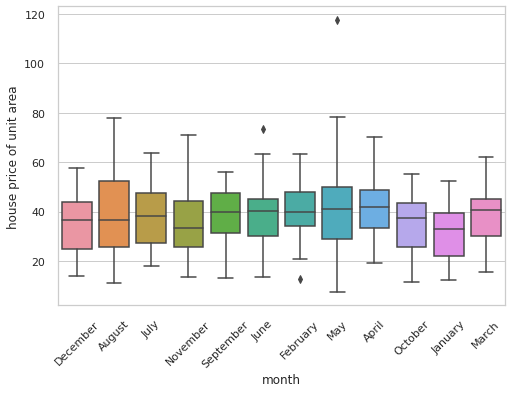

In [72]:
sns.boxplot(x='month', y='house price of unit area', data=df)
plt.xticks(rotation = 45)

Now, to check the effect of feature engineering, I will be doing the same regression, tuning, and metrics as above.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
ohe = ohe = OneHotEncoder(sparse=False)

In [74]:
from sklearn import set_config
set_config(display='diagram')

In [75]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

Building a pipeline, which will process the data.

In [76]:
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [77]:
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder', OneHotEncoder(sparse=False))])

In [78]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f11199522d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1119952750>)])

In [79]:
bag_tree = BaggingRegressor(random_state = 42)
bag_pipe_proc = make_pipeline(preprocessor, bag_tree)
bag_pipe_proc.fit(X_train, y_train)
evaluate(bag_pipe_proc, X_train, X_test, y_train, y_test)

Training Accuracy: 0.944
Test Accuracy: 0.721


We can see that no metrics are noteably improved by the feature engineering.

In [80]:
eval(y_test, bagreg.predict(X_test))

scores: 
MAE: 4.45 
MSE: 44.46 
RMSE: 6.67 
R2: 0.72


In [81]:
eval(y_test, bag_pipe_proc.predict(X_test))

scores: 
MAE: 4.44 
MSE: 44.31 
RMSE: 6.66 
R2: 0.72


### Feature Engineering:
First, I will use GridSearch, which was loading endlessly, so I did it manually.  The code below should be correct, however.

In [82]:
bag_pipe_proc.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f11199522d0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f1119952750>)])),
  ('baggingregressor', BaggingRegressor(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                 

In [83]:
param_grid2 = {'baggingregressor__n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50],
              'baggingregressor__max_samples': range(2,100),
              'baggingregressor__n_jobs': range(1,10)}

In [84]:
# This takes too long, but I wanted to demonstrate GridSearch
bag_pipe_gs = GridSearchCV(bag_pipe_proc, param_grid2)

bag_pipe_gs.fit(X_train, y_train)
print('Best Bagging Tree Parameters:')
print(bag_pipe_gs.best_params_)
best_bag_pipe = bag_pipe_gs.best_estimator_
print(f'Accuracy of best Bagging Tree model is: {best_bag_pipe.score(X_test, y_test)}')

KeyboardInterrupt: ignored

In [85]:
bag_tree = BaggingRegressor(random_state = 42)
bag_pipe_proc = make_pipeline(preprocessor, pca, bag_tree)
bag_pipe_proc.fit(X_train, y_train)
evaluate(bag_pipe_proc, X_train, X_test, y_train, y_test)

Training Accuracy: 0.914
Test Accuracy: 0.622


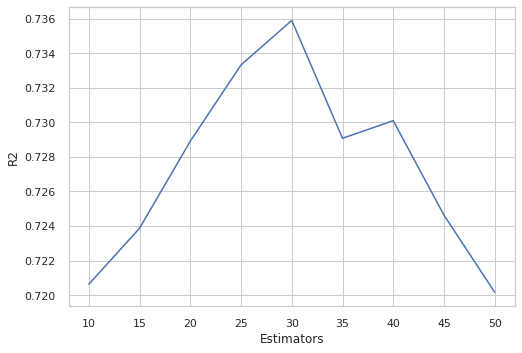

,Train Score,Test Score
30,0.948251,0.735892
25,0.950385,0.733321
40,0.945861,0.730093
35,0.945592,0.729077
20,0.949678,0.728911
45,0.944207,0.724636
15,0.949286,0.723879
10,0.944347,0.72064
50,0.943948,0.720177


In [86]:
estimators_proc = [10, 15, 20, 25, 30, 35, 40, 45, 50]
bag_scores_proc = pd.DataFrame(index=estimators_proc, columns=['Train Score', 'Test Score'])
for num_estimators_proc in estimators_proc:
   bag_pipe_p = BaggingRegressor(n_estimators=num_estimators_proc, random_state=42)
   bag_pipe_proc = make_pipeline(preprocessor, bag_pipe_p)
   bag_pipe_proc.fit(X_train, y_train)
   bag_train_score_proc = bag_pipe_proc.score(X_train, y_train)
   bag_test_score_proc = bag_pipe_proc.score(X_test, y_test)
   bag_scores_proc.loc[num_estimators_proc, 'Train Score'] = bag_train_score_proc
   bag_scores_proc.loc[num_estimators_proc, 'Test Score'] = bag_test_score_proc

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores_proc['Test Score'])
plt.show()
bag_scores_proc = bag_scores_proc.sort_values(by='Test Score', ascending=False)
bag_scores_proc

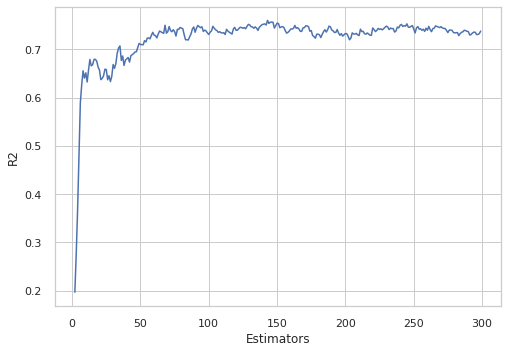

,Train Score,Test Score
143,0.876188,0.760205
146,0.878004,0.756695
145,0.877572,0.756441
147,0.878165,0.75624
150,0.878888,0.75435
...,...,...
6,0.564376,0.588781
5,0.481093,0.481652
4,0.410236,0.367647
3,0.297167,0.276597


In [87]:
samples_proc = list(range(2, 300))
bag_scores2_proc = pd.DataFrame(index=samples_proc, columns=['Train Score', 'Test Score'])
for sample_proc in samples_proc:
   bag_reg_fin_p = BaggingRegressor(max_samples=sample_proc, random_state=42, n_estimators=30)
   bag_reg_fin_proc = make_pipeline(preprocessor, bag_reg_fin_p)
   bag_reg_fin_proc.fit(X_train, y_train)
   bag_train_score2_proc = bag_reg_fin_proc.score(X_train, y_train)
   bag_test_score2_proc = bag_reg_fin_proc.score(X_test, y_test)
   bag_scores2_proc.loc[sample_proc, 'Train Score'] = bag_train_score2_proc
   bag_scores2_proc.loc[sample_proc, 'Test Score'] = bag_test_score2_proc

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores2_proc['Test Score'])
plt.show()
bag_scores2_proc = bag_scores2_proc.sort_values(by='Test Score', ascending=False)
bag_scores2_proc

In [102]:
bag_reg_fin_p = BaggingRegressor(max_samples=143, n_estimators=30, random_state=42)
bag_reg_fin_proc = make_pipeline(preprocessor, bag_reg_fin_p)
bag_reg_fin_proc.fit(X3_train, y3_train)
evaluate(bag_reg_fin_proc, X3_train, X3_test, y3_train, y3_test)

Training Accuracy: 0.867
Test Accuracy: 0.727


The feature engineering had no substantial change in R2, but did slightly decrease our variance.  It is worth doing, but does not strengthen the data so much that it is a particularly strong model.  Now testing PCA and feature engineering.

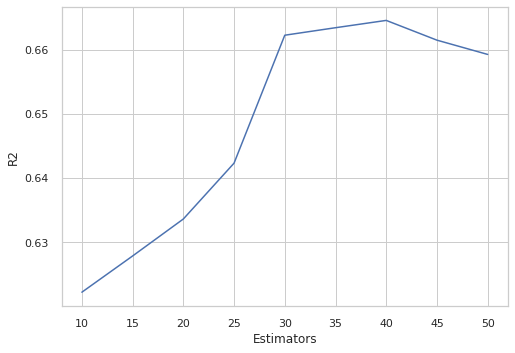

,Train Score,Test Score
40,0.940736,0.664532
35,0.939158,0.663395
30,0.936978,0.662229
45,0.940341,0.661459
50,0.940898,0.659239
25,0.935168,0.642323
20,0.93363,0.633634
15,0.934809,0.627882
10,0.913923,0.622246


In [89]:
estimators_proc2 = [10, 15, 20, 25, 30, 35, 40, 45, 50]
bag_scores_proc2 = pd.DataFrame(index=estimators_proc2, columns=['Train Score', 'Test Score'])
for num_estimators_proc2 in estimators_proc2:
   bag_pipe_p2 = BaggingRegressor(n_estimators=num_estimators_proc2, random_state=42)
   bag_pipe_proc2 = make_pipeline(preprocessor, pca, bag_pipe_p2)
   bag_pipe_proc2.fit(X_train, y_train)
   bag_train_score_proc2 = bag_pipe_proc2.score(X_train, y_train)
   bag_test_score_proc2 = bag_pipe_proc2.score(X_test, y_test)
   bag_scores_proc2.loc[num_estimators_proc2, 'Train Score'] = bag_train_score_proc2
   bag_scores_proc2.loc[num_estimators_proc2, 'Test Score'] = bag_test_score_proc2

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores_proc2['Test Score'])
plt.show()
bag_scores_proc2 = bag_scores_proc2.sort_values(by='Test Score', ascending=False)
bag_scores_proc2

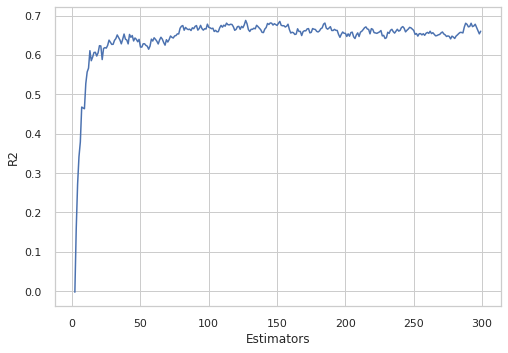

,Train Score,Test Score
127,0.82888,0.687916
152,0.862818,0.685344
145,0.852251,0.681505
185,0.881909,0.681227
113,0.806152,0.681042
...,...,...
6,0.412856,0.379112
5,0.372653,0.34127
4,0.317838,0.271853
3,0.175645,0.158872


In [90]:
samples_proc2 = list(range(2, 300))
bag_scores2_proc2 = pd.DataFrame(index=samples_proc2, columns=['Train Score', 'Test Score'])
for sample_proc2 in samples_proc2:
   bag_reg_fin_p2 = BaggingRegressor(max_samples=sample_proc2, random_state=42, n_estimators=40)
   bag_reg_fin_proc2 = make_pipeline(preprocessor, pca, bag_reg_fin_p2)
   bag_reg_fin_proc2.fit(X_train, y_train)
   bag_train_score2_proc2 = bag_reg_fin_proc2.score(X_train, y_train)
   bag_test_score2_proc2 = bag_reg_fin_proc2.score(X_test, y_test)
   bag_scores2_proc2.loc[sample_proc2, 'Train Score'] = bag_train_score2_proc2
   bag_scores2_proc2.loc[sample_proc2, 'Test Score'] = bag_test_score2_proc2

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores2_proc2['Test Score'])
plt.show()
bag_scores2_proc2 = bag_scores2_proc2.sort_values(by='Test Score', ascending=False)
bag_scores2_proc2

In [92]:
X3 = df.drop(columns=['house price of unit area'])
y3 = df['house price of unit area']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [96]:
print('Training')
eval(y_train, best_bag.predict(X_train))
print('Testing')
eval(y_test, best_bag.predict(X_test))

Training
scores: 
MAE: 3.65 
MSE: 34.42 
RMSE: 5.87 
R2: 0.82
Testing
scores: 
MAE: 4.10 
MSE: 38.38 
RMSE: 6.20 
R2: 0.76


In [109]:
best_pca_p = BaggingRegressor(max_samples=127, random_state=42,  n_estimators=40)
best_pca_proc = make_pipeline(preprocessor, pca, best_pca_p)
best_pca_proc.fit(X3_train, y3_train)
print('Training')
eval(y3_train, best_pca_proc.predict(X3_train))
print('Testing')
eval(y3_test, best_pca_proc.predict(X3_test))

Training
scores: 
MAE: 3.73 
MSE: 33.09 
RMSE: 5.75 
R2: 0.83
Testing
scores: 
MAE: 5.05 
MSE: 47.66 
RMSE: 6.90 
R2: 0.70


In [114]:
print('Training')
eval(y_train, best_pca.predict(X2_train))
print('Testing')
eval(y_test, best_pca.predict(X2_test))

Training
scores: 
MAE: 2.30 
MSE: 13.17 
RMSE: 3.63 
R2: 0.93
Testing
scores: 
MAE: 4.24 
MSE: 41.26 
RMSE: 6.42 
R2: 0.74


###Processing Results:

Processing the features did not yield any results.  This makes sense, the data is in a presentable and organized format.  Engineering the feature is more for readability in this case.